<a href="https://colab.research.google.com/github/mdsozon24/100-days-of-ML-AI-challenge/blob/main/Data-processing/DataSet_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import sklearn

In [10]:
from sklearn.datasets import load_iris

In [11]:
load_iris(return_X_y = True)

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [12]:
x, y = load_iris(return_X_y = True)

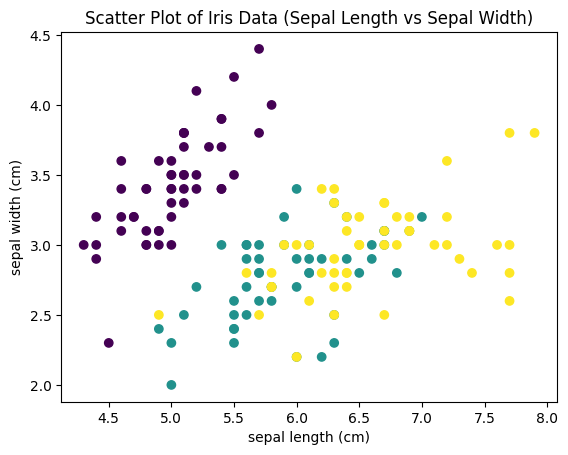

In [13]:
import matplotlib.pyplot as plt

iris = load_iris()

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Scatter Plot of Iris Data (Sepal Length vs Sepal Width)')
plt.show()

In [14]:
import pandas as pd

In [15]:
from sklearn.datasets import fetch_openml

In [16]:
df = fetch_openml('titanic',version = 1 , as_frame = True)['data']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


In [18]:
df.isnull().sum()

,0
pclass,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014
embarked,2


In [19]:
import seaborn as sns

<Axes: title={'center': 'Missing Values'}, ylabel='Percentage'>

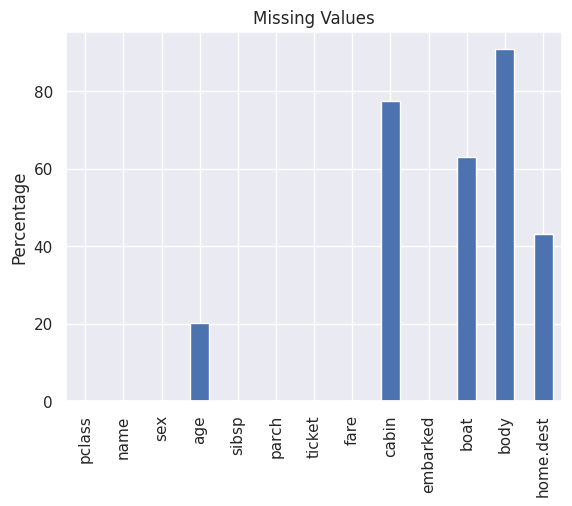

In [20]:
sns.set()
missing = (df.isnull().sum()/len(df))*100
missing.plot(kind = 'bar', title = 'Missing Values', ylabel = 'Percentage')

In [21]:
df.shape

(1309, 13)

In [22]:
df2 = df.drop(['body'], axis = 1)

In [23]:
df2.shape

(1309, 12)

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
df2.age.isnull().sum()

np.int64(263)

In [26]:
imp = SimpleImputer(strategy = 'mean')
df2['age'] = imp.fit_transform(df2[['age']])

In [27]:
df2.age.isnull().sum()

np.int64(0)

In [28]:
def get_parameter(df):
    parameter = {}
    for col in df.columns[df.isnull().any()]:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64' or df[col].dtype == 'int32':
            strategy = 'mean'
        else:
            strategy = 'most_frequent'
        missing_val = df[col][df[col].isnull()].values[0]
        parameter[col] = {'missing_val' : missing_val, 'strategy': strategy}
    return parameter

In [29]:
parameter = get_parameter(df2)

In [30]:
import numpy as np

for col, par in parameter.items():
    imp = SimpleImputer(missing_values=np.nan, strategy=par['strategy'])
    df2[col] = imp.fit_transform(df2[[col]]).ravel()  # Use ravel() to flatten the array

In [31]:
df2.isnull().sum()

,0
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
cabin,0
embarked,0


In [32]:
df2

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C23 C25 C27,C,13,"New York, NY"
1305,3,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,C23 C25 C27,C,13,"New York, NY"
1306,3,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C23 C25 C27,C,13,"New York, NY"
1307,3,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C23 C25 C27,C,13,"New York, NY"


<Axes: title={'center': 'Travelled Alone'}, xlabel='travelled_alone'>

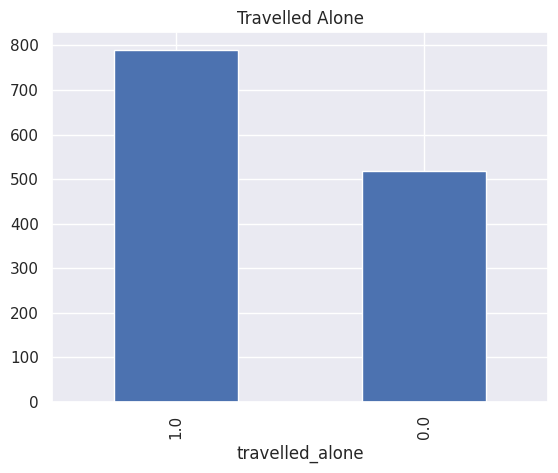

In [33]:
df2['family'] = df2['sibsp'] + df2['parch']
df2.loc[df2['family'] > 0, 'travelled_alone' ] = 0
df2.loc[df2['family'] == 0, 'travelled_alone' ] = 1
df2['travelled_alone'].value_counts().plot(kind = 'bar', title = 'Travelled Alone')

In [34]:
from sklearn.preprocessing import OneHotEncoder
df2[['female','male']] = OneHotEncoder().fit_transform(df2[['sex']]).toarray()
df2[['sex','female','male']]

,sex,female,male
0,female,1.0,0.0
1,male,0.0,1.0
2,female,1.0,0.0
3,male,0.0,1.0
4,female,1.0,0.0
...,...,...,...
1304,female,1.0,0.0
1305,female,1.0,0.0
1306,male,0.0,1.0
1307,male,0.0,1.0


In [35]:
df2['sex'] = OneHotEncoder().fit_transform(df2[['sex']]).toarray()[:,1]

In [36]:
df2

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,family,travelled_alone,female,male
0,1,"Allen, Miss. Elisabeth Walton",0.0,29.000000,0,0,24160,211.3375,B5,S,2,"St Louis, MO",0,1.0,1.0,0.0
1,1,"Allison, Master. Hudson Trevor",1.0,0.916700,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",3,0.0,0.0,1.0
2,1,"Allison, Miss. Helen Loraine",0.0,2.000000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",3,0.0,1.0,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",1.0,30.000000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",3,0.0,0.0,1.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.000000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",3,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",0.0,14.500000,1,0,2665,14.4542,C23 C25 C27,C,13,"New York, NY",1,0.0,1.0,0.0
1305,3,"Zabour, Miss. Thamine",0.0,29.881135,1,0,2665,14.4542,C23 C25 C27,C,13,"New York, NY",1,0.0,1.0,0.0
1306,3,"Zakarian, Mr. Mapriededer",1.0,26.500000,0,0,2656,7.2250,C23 C25 C27,C,13,"New York, NY",0,1.0,0.0,1.0
1307,3,"Zakarian, Mr. Ortin",1.0,27.000000,0,0,2670,7.2250,C23 C25 C27,C,13,"New York, NY",0,1.0,0.0,1.0


In [37]:
from sklearn.preprocessing import StandardScaler
sacler = StandardScaler()

In [38]:
col = df2.select_dtypes(include = ['int64','float64','int32']).columns
col

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'family',
       'travelled_alone', 'female', 'male'],
      dtype='object')

In [39]:
df2[col] = sacler.fit_transform(df2[col])
df2[col]

,pclass,sex,age,sibsp,parch,fare,family,travelled_alone,female,male
0,-1.546098,-1.344995,-6.842022e-02,-0.479087,-0.445000,3.442480,-0.558346,0.810532,1.344995,-1.344995
1,-1.546098,0.743497,-2.249092e+00,0.481288,1.866526,2.286476,1.336749,-1.233758,-0.743497,0.743497
2,-1.546098,-1.344995,-2.164974e+00,0.481288,1.866526,2.286476,1.336749,-1.233758,1.344995,-1.344995
3,-1.546098,0.743497,9.229922e-03,0.481288,1.866526,2.286476,1.336749,-1.233758,-0.743497,0.743497
4,-1.546098,-1.344995,-3.790208e-01,0.481288,1.866526,2.286476,1.336749,-1.233758,1.344995,-1.344995
...,...,...,...,...,...,...,...,...,...,...
1304,0.841916,-1.344995,-1.194347e+00,0.481288,-0.445000,-0.364300,0.073352,-1.233758,1.344995,-1.344995
1305,0.841916,-1.344995,2.758687e-16,0.481288,-0.445000,-0.364300,0.073352,-1.233758,1.344995,-1.344995
1306,0.841916,0.743497,-2.625456e-01,-0.479087,-0.445000,-0.504078,-0.558346,0.810532,-0.743497,0.743497
1307,0.841916,0.743497,-2.237205e-01,-0.479087,-0.445000,-0.504078,-0.558346,0.810532,-0.743497,0.743497


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [41]:
df2[col] = scaler.fit_transform(df2[col])
df2[col]

,pclass,sex,age,sibsp,parch,fare,family,travelled_alone,female,male
0,0.0,0.0,0.361169,0.000,0.000000,0.412503,0.0,1.0,1.0,0.0
1,0.0,1.0,0.009395,0.125,0.222222,0.295806,0.3,0.0,0.0,1.0
2,0.0,0.0,0.022964,0.125,0.222222,0.295806,0.3,0.0,1.0,0.0
3,0.0,1.0,0.373695,0.125,0.222222,0.295806,0.3,0.0,0.0,1.0
4,0.0,0.0,0.311064,0.125,0.222222,0.295806,0.3,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1304,1.0,0.0,0.179540,0.125,0.000000,0.028213,0.1,0.0,1.0,0.0
1305,1.0,0.0,0.372206,0.125,0.000000,0.028213,0.1,0.0,1.0,0.0
1306,1.0,1.0,0.329854,0.000,0.000000,0.014102,0.0,1.0,0.0,1.0
1307,1.0,1.0,0.336117,0.000,0.000000,0.014102,0.0,1.0,0.0,1.0
